In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import sklearn

%matplotlib inline 

In [3]:
nba = pd.read_csv('nba_players.csv') # melihat data kita secara keseluruhan
nba

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


# __Data Preprocessing__

In [5]:
nba.describe() # deskripsi data kita seperti apa

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [6]:
nba.info() # mengecek info seperti tipe data, nilai null dan kolom apa saja yang terdapat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [8]:
print(nba.columns) # mengecek ulang seluruh kolom yang ada

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')


In [9]:
nba.isna().sum() # mengecek nilai yang tidak ada / missing value

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

In [15]:
item_list = [] # gabungan dari keseluruhan data yang ingin kita proses nantinya
for col in nba.columns:
    item_list.append([col, nba[col].dtype, nba[col].isna().sum(), round((nba[col].isna().sum()/len(nba[col]))*100,2),
                      nba[col].nunique(), list(nba[col].sample(5).drop_duplicates().values)])

nba_Desc = pd.DataFrame(columns=['feature', 'type_data', 'null', 'nulPct', 'unique', 'uniqueSample'],data=item_list)
nba_Desc

,feature,type_data,null,nulPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,11145,"[2258, 3570, 1568, 8231, 5698]"
1,Unnamed: 0.1,int64,0,0.0,11145,"[91, 2440, 2709, 9547, 2322]"
2,player_name,object,0,0.0,2235,"[Antonio McDyess, Sun Sun, Tristan Thompson, S..."
3,team_abbreviation,object,0,0.0,36,"[TOR, LAC, CHI, DAL]"
4,age,float64,0,0.0,27,"[21.0, 20.0, 28.0, 30.0]"
5,player_height,float64,0,0.0,30,"[213.36, 195.58, 208.28, 193.04]"
6,player_weight,float64,0,0.0,157,"[102.0582, 111.13004, 108.86208, 99.79024, 78...."
7,college,object,0,0.0,316,"[None, Arizona State, Connecticut, Nevada-Las ..."
8,country,object,0,0.0,76,[USA]
9,draft_year,object,0,0.0,45,"[Undrafted, 2019, 2015]"


<AxesSubplot:>

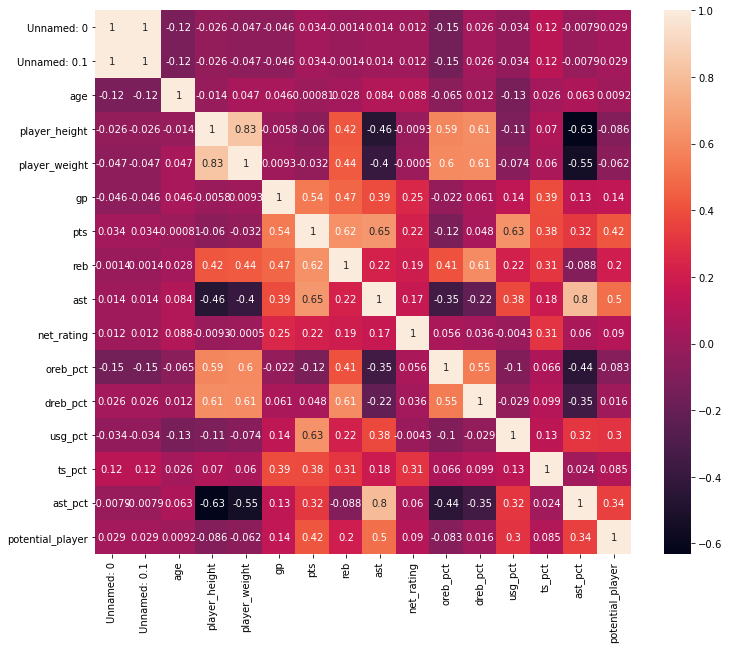

In [10]:
# mengecek korelasi dengan heatmap

plt.figure(figsize=(12,10))
sns.heatmap(nba.corr(),annot=True)

__Terlihat bahwa banyak yang tidak berkorelasi satu dengan yang lain, sehingga pemilihan data menjadi penting dan krusial, di bawah ini akan di lihat secara lebih mendetail, kolom-kolom yang sekiranya perlu perhatian khusus, karena tidak ada di dalam korelasi pada heatmap di atas ( tipe data yang berupa object )__

In [13]:
nba['college'].value_counts()

None               1684
Kentucky            360
Duke                331
North Carolina      318
UCLA                280
                   ... 
Loyola (IL)           1
Miami (Fla.)          1
Fairfield             1
Texas-Arlington       1
North Texas           1
Name: college, Length: 316, dtype: int64

In [14]:
nba['country'].value_counts()

USA                    9410
France                  153
Canada                  140
Spain                    79
Brazil                   78
                       ... 
Angola                    1
Trinidad and Tobago       1
Sudan                     1
Sudan (UK)                1
Guinea                    1
Name: country, Length: 76, dtype: int64

In [17]:
nba['draft_year'].value_counts().head(10)

Undrafted    1942
1998          454
2003          430
2005          420
1996          406
2001          403
2008          381
1999          366
2000          364
2004          362
Name: draft_year, dtype: int64

In [18]:
nba['draft_round'].value_counts()

1            6513
2            2629
Undrafted    1959
3              20
4              12
7               5
6               5
8               2
Name: draft_round, dtype: int64

In [19]:
nba['draft_number'].value_counts()

Undrafted    1959
5             320
1             320
4             311
2             299
             ... 
127             1
139             1
82              1
63              1
87              1
Name: draft_number, Length: 75, dtype: int64

In [20]:
nba['player_name'].value_counts()

Vince Carter        22
Dirk Nowitzki       21
Kobe Bryant         20
Kevin Garnett       20
Tyson Chandler      19
                    ..
Rodney Purvis        1
David Vanterpool     1
Marko Guduric        1
James Webb III       1
Sherron Collins      1
Name: player_name, Length: 2235, dtype: int64

In [21]:
nba['season'].value_counts()

2017-18    540
2018-19    530
2019-20    514
2014-15    492
2016-17    486
2013-14    482
2011-12    478
2015-16    476
2012-13    469
2004-05    464
2005-06    458
2006-07    458
2010-11    452
2007-08    451
2008-09    445
2003-04    442
2009-10    442
2000-01    441
1996-97    441
2001-02    440
1997-98    439
1998-99    439
1999-00    438
2002-03    428
Name: season, dtype: int64

In [22]:
nba[nba['player_name'] == 'Kobe Bryant'].head(5)

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
342,342,342,Kobe Bryant,LAL,18.0,200.66,90.71840,None,USA,1996,...,1.9,1.3,2.2,0.048,0.084,0.244,0.544,0.144,1996-97,0
536,536,536,Kobe Bryant,LAL,19.0,200.66,95.25432,None,USA,1996,...,3.1,2.5,6.9,0.044,0.088,0.268,0.548,0.165,1997-98,0
1098,1098,1098,Kobe Bryant,LAL,20.0,200.66,97.52228,None,USA,1996,...,5.3,3.8,2.8,0.033,0.128,0.254,0.549,0.176,1998-99,0
1649,1649,1649,Kobe Bryant,LAL,21.0,200.66,95.25432,None,USA,1996,...,6.3,4.9,10.4,0.046,0.128,0.266,0.546,0.215,1999-00,1
2079,2079,2079,Kobe Bryant,LAL,22.0,200.66,95.25432,None,USA,1996,...,5.9,5.0,6.3,0.042,0.117,0.315,0.552,0.220,2000-01,1


__Kobe Bryant adalah pemain terkenal sepanjang masa, prestasi segudang membuat dia terpilih 2x, sebagai potential player pada season 1999 dan 2000. hanya saja, nama tidak termasuk dalam kategori bagaimana seseorang berpotensi sebagai pemain yang handal di masa depannya. banyak hal yang lebih relevan seperti point, rebound, dll. Tapi akan kita proses terlebih dahulu, untuk menemukan insight lebih mendalam lagi. Tetapi, kolom nama tidak akan dimasukkan ke dalam yang akan diprediksi, terlihat juga pada database yang baru, nama bukanlah faktor penting dalam pemilihan pemain yang berpotensi. Menurut saya pribadi, yang paling penting adalah 6 kolom di bawah ini, sehingga saya drop yang lainnya dan hanya memunculkan 6 kolom tersebut__

In [25]:
nba_clean = nba.drop(['Unnamed: 0', 'Unnamed: 0.1', 'age','player_height','player_weight','gp','net_rating','oreb_pct','dreb_pct','ts_pct','draft_number','college','draft_year','draft_round','team_abbreviation','country','season','player_name'],axis=1)
nba_clean

,pts,reb,ast,usg_pct,ast_pct,potential_player
0,5.7,16.1,3.1,0.100,0.113,0
1,2.3,1.5,0.3,0.175,0.048,0
2,0.8,1.0,0.4,0.103,0.148,0
3,3.7,2.3,0.6,0.167,0.077,0
4,2.4,2.4,0.2,0.127,0.040,0
...,...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064,0
11141,1.2,0.3,0.1,0.164,0.033,0
11142,6.1,5.1,1.1,0.120,0.076,0
11143,2.1,3.0,0.4,0.126,0.056,0


In [26]:
nba_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pts               11145 non-null  float64
 1   reb               11145 non-null  float64
 2   ast               11145 non-null  float64
 3   usg_pct           11145 non-null  float64
 4   ast_pct           11145 non-null  float64
 5   potential_player  11145 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 522.5 KB


In [27]:
nba_clean.describe()

,pts,reb,ast,usg_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,8.126487,3.560036,1.801463,0.185599,0.131078,0.040825
std,5.935482,2.495394,1.789940,0.053047,0.095017,0.197895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.800000,0.600000,0.150000,0.065000,0.000000
50%,6.600000,3.000000,1.200000,0.182000,0.102000,0.000000
75%,11.500000,4.700000,2.400000,0.218000,0.178000,0.000000
max,36.100000,16.300000,11.700000,1.000000,1.000000,1.000000


# __Data Visualization__

__kita akan mencoba untuk melihat seberapa banyak orang yang berpotensi di dalam dataset yang ada__

In [38]:
nba_viz = nba.drop(['Unnamed: 0', 'Unnamed: 0.1','age','player_height','player_weight','gp','net_rating','oreb_pct','dreb_pct','ts_pct','draft_number','college','draft_year','draft_round','team_abbreviation','country','season','player_name'],axis=1)
nba_viz

,pts,reb,ast,usg_pct,ast_pct,potential_player
0,5.7,16.1,3.1,0.100,0.113,0
1,2.3,1.5,0.3,0.175,0.048,0
2,0.8,1.0,0.4,0.103,0.148,0
3,3.7,2.3,0.6,0.167,0.077,0
4,2.4,2.4,0.2,0.127,0.040,0
...,...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064,0
11141,1.2,0.3,0.1,0.164,0.033,0
11142,6.1,5.1,1.1,0.120,0.076,0
11143,2.1,3.0,0.4,0.126,0.056,0


In [39]:
def potential_player(x) : # mengubah dari binary menjadi categorical, demi mempermudah visualisasi
    if x == 1 :
        x = 'Potential'
    else :
        x = 'Non Potential'
    return x

In [40]:
nba_viz['potential_player'] = nba_viz['potential_player'].map(potential_player)
nba_viz

,pts,reb,ast,usg_pct,ast_pct,potential_player
0,5.7,16.1,3.1,0.100,0.113,Non Potential
1,2.3,1.5,0.3,0.175,0.048,Non Potential
2,0.8,1.0,0.4,0.103,0.148,Non Potential
3,3.7,2.3,0.6,0.167,0.077,Non Potential
4,2.4,2.4,0.2,0.127,0.040,Non Potential
...,...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064,Non Potential
11141,1.2,0.3,0.1,0.164,0.033,Non Potential
11142,6.1,5.1,1.1,0.120,0.076,Non Potential
11143,2.1,3.0,0.4,0.126,0.056,Non Potential


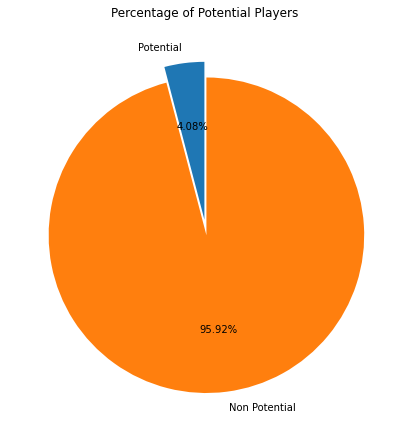

In [42]:
values = list(nba_viz['potential_player'].value_counts().sort_values().values)
labels = list(nba_viz['potential_player'].value_counts().sort_values().index)
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, explode = explode, 
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title('Percentage of Potential Players')
plt.tight_layout()

__terlihat hanya lebih kurang 4% data kita saja yang memiliki pemain yang berpotensi__

<AxesSubplot:xlabel='potential_player', ylabel='pts'>

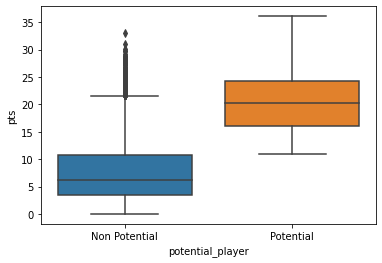

In [43]:
sns.boxplot(x='potential_player',y='pts',data=nba_viz)

__Mayoritas orang yang tidak potensial, memiliki perolehan skor yang lebih rendah, walau ada juga yang nilainya sama bahkan lebih baik dari rata-rata perolehan skor, dari pemain yang berpotensi. Hal tersebut merupakan _outliers_ dari data pemain yang tidak berpotensi__

<AxesSubplot:xlabel='potential_player', ylabel='reb'>

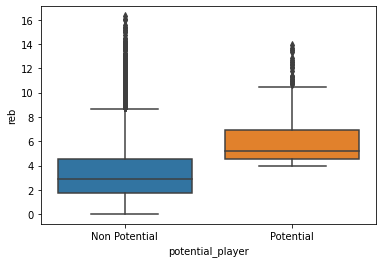

In [44]:
sns.boxplot(x='potential_player',y='reb',data=nba_viz)

__Begitu juga dengan nilai reb, dimana mayoritas orang yang tidak potensial, memiliki perolehan reb yang lebih rendah, walau ada juga yang nilainya sama bahkan lebih baik dari rata-rata perolehan reb, dari pemain yang berpotensi. Hal yang sama terjadi juga pada pemain yang berpotensi. Hal tersebut merupakan _outliers_ dari data pemain yang tidak berpotensi dan berpotensi__

<AxesSubplot:xlabel='potential_player', ylabel='ast'>

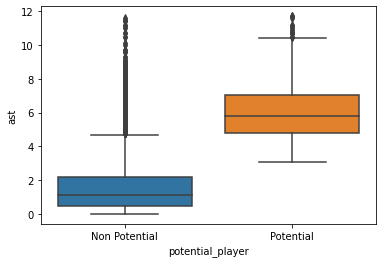

In [45]:
sns.boxplot(x='potential_player',y='ast',data=nba_viz)

__Untuk nilai ast, mayoritas orang yang tidak potensial, memiliki perolehan ast yang lebih rendah, walau ada juga yang nilainya sama bahkan lebih baik dari rata-rata perolehan ast, dari pemain yang berpotensi. Hal yang sama terjadi juga pada pemain yang berpotensi. Hal tersebut merupakan _outliers_ dari data pemain yang tidak berpotensi dan berpotensi__

<AxesSubplot:xlabel='potential_player', ylabel='usg_pct'>

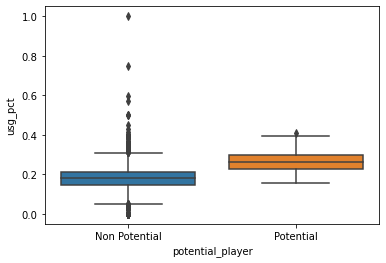

In [46]:
sns.boxplot(x='potential_player',y='usg_pct',data=nba_viz)

**(usg_pct) merupakan _Percentage of team plays used by the player while he was on the floor_ ,atau permainan tim oleh pemain. Dari visualisasi di atas, terbukti memang rata-rata pemain potensial, memiliki jiwa permainan tim yang lebih baik, ketimbang pemain yang tidak berpotensi. Namun, _outliers_ tertinggi justru berada pada pemain yang tidak berpotensi, dimana permainan tim mereka jauh di atas / melebihi nilai dari pemain yang berpotensi**

<AxesSubplot:xlabel='potential_player', ylabel='ast_pct'>

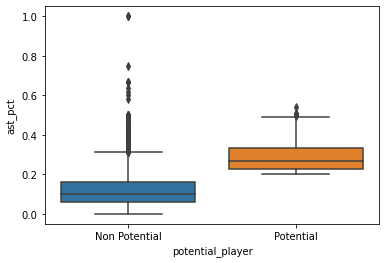

In [47]:
sns.boxplot(x='potential_player',y='ast_pct',data=nba_viz)

**yang terakhir, mengenai (ast_pct), dimana kolom tersebut adalah _Percentage of teammate field goals the player assisted while he was on the floor_ , atau skor yang di cetak oleh teman pemain, ketika pemain berada di lapangan. Kembali lagi terlihat bahwa, skor ast_pct pemain yang tidak berpotensi, lebih rendah ketimbang pemain yang berpotensi, walaupun, pada kenyataannya, _outliers_ data kembali lebih condong terhadap pemain yang tidak berpotensi**

# __Model Evaluation__

In [48]:
nba_clean

,pts,reb,ast,usg_pct,ast_pct,potential_player
0,5.7,16.1,3.1,0.100,0.113,0
1,2.3,1.5,0.3,0.175,0.048,0
2,0.8,1.0,0.4,0.103,0.148,0
3,3.7,2.3,0.6,0.167,0.077,0
4,2.4,2.4,0.2,0.127,0.040,0
...,...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064,0
11141,1.2,0.3,0.1,0.164,0.033,0
11142,6.1,5.1,1.1,0.120,0.076,0
11143,2.1,3.0,0.4,0.126,0.056,0


__data yang akan kita jadikan sebagai target / y yang akan diprediksi adalah potential player, oleh karena itu harus kita drop dari dataframe kita dan di jadikan y__

In [ ]:
target = nba_clean.potential_player
nba_clean.drop(['potential_player'], axis=1, inplace=True) # tadi ke run untuk yang kedua kalinya makanya ada error, jadinya saya ulangi

In [56]:
target

0        0
1        0
2        0
3        0
4        0
        ..
11140    0
11141    0
11142    0
11143    0
11144    0
Name: potential_player, Length: 11145, dtype: int64

In [59]:
nba_viz['potential_player'].value_counts(normalize=True)*100

Non Potential    95.917452
Potential         4.082548
Name: potential_player, dtype: float64

In [62]:
X = nba_clean
y = target

In [63]:
X

,pts,reb,ast,usg_pct,ast_pct
0,5.7,16.1,3.1,0.100,0.113
1,2.3,1.5,0.3,0.175,0.048
2,0.8,1.0,0.4,0.103,0.148
3,3.7,2.3,0.6,0.167,0.077
4,2.4,2.4,0.2,0.127,0.040
...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064
11141,1.2,0.3,0.1,0.164,0.033
11142,6.1,5.1,1.1,0.120,0.076
11143,2.1,3.0,0.4,0.126,0.056


In [64]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11140    0
11141    0
11142    0
11143    0
11144    0
Name: potential_player, Length: 11145, dtype: int64

## __Train Test Split__

In [65]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state = 2021)
# agar mempermudah kita dalam melakukan data preprocessing, data di buat random state 2021 dan stratify = y

# __Benchmark Machine Learning Model & Cross Val Score__

__Model yang di pilih kali ini adalah Logistic Regression dan Decision Tree Classifier, dengan random_state yang sudah di buat sama, agar menghasilkan hasil prediksi yang tidak berubah-ubah nilainya__

In [67]:
logit = LogisticRegression(random_state=2021)
dtc = DecisionTreeClassifier(random_state=2021)

In [70]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [74]:
skfold = StratifiedKFold(n_splits = 5, random_state=2021, shuffle=True) # meng-guarantee ratio y pada train dan val, sama

logit_cv = cross_val_score(logit, X_train_val, y_train_val, cv = skfold, scoring='recall')
dtc_cv = cross_val_score(dtc, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [75]:
print('CV Logistic Regression', logit_cv)
print('CV DecisionTree', dtc_cv)

CV Logistic Regression [0.36986301 0.51388889 0.46575342 0.53424658 0.43835616]
CV DecisionTree [0.95890411 0.94444444 0.98630137 0.95890411 0.98630137]


In [76]:
print('CV Logistic Regression', logit_cv.mean())
print('CV DecisionTree', dtc_cv.mean())

CV Logistic Regression 0.46442161339421606
CV DecisionTree 0.9669710806697107


# __Model Tuned__

In [79]:
nba_clean

,pts,reb,ast,usg_pct,ast_pct
0,5.7,16.1,3.1,0.100,0.113
1,2.3,1.5,0.3,0.175,0.048
2,0.8,1.0,0.4,0.103,0.148
3,3.7,2.3,0.6,0.167,0.077
4,2.4,2.4,0.2,0.127,0.040
...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064
11141,1.2,0.3,0.1,0.164,0.033
11142,6.1,5.1,1.1,0.120,0.076
11143,2.1,3.0,0.4,0.126,0.056


In [81]:
nba_clean.describe()

,pts,reb,ast,usg_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,8.126487,3.560036,1.801463,0.185599,0.131078
std,5.935482,2.495394,1.789940,0.053047,0.095017
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.800000,0.600000,0.150000,0.065000
50%,6.600000,3.000000,1.200000,0.182000,0.102000
75%,11.500000,4.700000,2.400000,0.218000,0.178000
max,36.100000,16.300000,11.700000,1.000000,1.000000


In [117]:
#PIPELINE Logistic Regression

#scaler dengan minmax scaler agar sama rentangnya dengan usg_pct dan ast_pct
scaled_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

#2. TRANSFROM
transformer = ColumnTransformer([
    ('scaler', scaled_pipeline, ['pts', 'reb', 'ast']),
], remainder = 'passthrough')

#3. MODEL INITIALIZING
logit_new = LogisticRegression(random_state=2021)
smote = SMOTE(random_state=2021)
rfe = RFE(estimator=logit_new)

#4. MEMBUAT PIPELINE BESAR
logit_all_pipeline = Pipeline([
    ('transformer', transformer),
    ('resampling', smote),
    ('rfe', rfe),
    ('clf', logit_new)
])

In [118]:
logit_all_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('scaler',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    ['pts', 'reb', 'ast'])])),
  ('resampling', SMOTE(random_state=2021)),
  ('rfe', RFE(estimator=LogisticRegression(random_state=2021))),
  ('clf', LogisticRegression(random_state=2021))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler',
                                  Pipeline(steps=[('scaler', MinMaxScaler())]),
                                  ['pts', 'reb', 'ast'])]),
 'resampling': SMOTE(random_state=2021),
 'rfe': RFE(estimator=LogisticRegression(random_state=2021)),
 'clf': LogisticRegression(random_state=2021),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer__transformer_weights':

In [120]:
hyperparam_space = {
    'clf__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'clf__max_iter': [100, 200, 300, 400, 500, 1000],
    'clf__solver': ['liblinear', 'newton-cg']
    
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

logitgridsearch = GridSearchCV(logit_all_pipeline, hyperparam_space, scoring='recall', n_jobs=-1, cv=skf, verbose=1)
logitgridsearch.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['pts',
                                                                          'reb',
                                                                          'ast'])])),
                                       ('resampling', SMOTE(random_state=2021)),
                                       ('rfe',
                                        RFE(estimator=LogisticRegression(random_state=2021))),
                     

In [121]:
logitgridsearch.best_params_

{'clf__C': 0.001, 'clf__max_iter': 100, 'clf__solver': 'liblinear'}

In [122]:
logitgridsearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pts', 'reb', 'ast'])])),
                ('resampling', SMOTE(random_state=2021)),
                ('rfe', RFE(estimator=LogisticRegression(random_state=2021))),
                ('clf',
                 LogisticRegression(C=0.001, random_state=2021,
                                    solver='liblinear'))])

In [123]:
cv_res_df = pd.DataFrame(logitgridsearch.cv_results_)
cv_res_df[cv_res_df['rank_test_score'] == 1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
144,0.510737,0.024151,0.019899,0.008492,0.001,100,liblinear,"{'clf__C': 0.001, 'clf__max_iter': 100, 'clf__...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
146,0.521266,0.038596,0.023987,0.012043,0.001,200,liblinear,"{'clf__C': 0.001, 'clf__max_iter': 200, 'clf__...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
148,0.435346,0.027703,0.030184,0.011474,0.001,300,liblinear,"{'clf__C': 0.001, 'clf__max_iter': 300, 'clf__...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
150,0.463897,0.024290,0.015904,0.000812,0.001,400,liblinear,"{'clf__C': 0.001, 'clf__max_iter': 400, 'clf__...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
152,0.437820,0.048609,0.026406,0.010368,0.001,500,liblinear,"{'clf__C': 0.001, 'clf__max_iter': 500, 'clf__...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [124]:
logit_default = logit_all_pipeline.fit(X_train_val, y_train_val)
y_pred_logit = logit_default.predict(X_test) 

In [125]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2138
           1       0.37      0.97      0.53        91

    accuracy                           0.93      2229
   macro avg       0.68      0.95      0.75      2229
weighted avg       0.97      0.93      0.95      2229



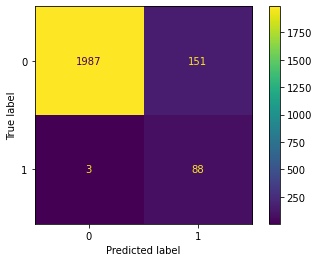

In [126]:
plot_confusion_matrix(logit_default, X_test, y_test)

In [127]:
logit_tuned = logitgridsearch.best_estimator_.fit(X_train_val, y_train_val)
y_pred_logit_tuned = logit_tuned.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred_logit_tuned))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2138
           1       0.19      1.00      0.32        91

    accuracy                           0.83      2229
   macro avg       0.60      0.91      0.61      2229
weighted avg       0.97      0.83      0.88      2229



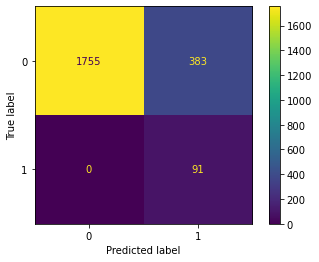

In [129]:
plot_confusion_matrix(logit_tuned, X_test, y_test)

In [88]:
#PIPELINE DTC

#scaler dengan minmax scaler agar sama rentangnya dengan usg_pct dan ast_pct
scaled_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

#2. TRANSFROM
transformer = ColumnTransformer([
    ('scaler', scaled_pipeline, ['pts', 'reb', 'ast']),
], remainder = 'passthrough')

#3. MODEL INITIALIZING
dtc_new = DecisionTreeClassifier(max_depth=5, random_state=2021)
smote = SMOTE(random_state=2021)
rfe = RFE(estimator=dtc_new)

#4. MEMBUAT PIPELINE BESAR
dtc_all_pipeline = Pipeline([
    ('transformer', transformer),
    ('resampling', smote),
    ('rfe', rfe),
    ('clf', dtc_new)
])

In [90]:
dtc_in_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('scaler',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    ['pts', 'reb', 'ast'])])),
  ('resampling', SMOTE(random_state=2021)),
  ('rfe',
   RFE(estimator=DecisionTreeClassifier(max_depth=5, random_state=2021))),
  ('clf', DecisionTreeClassifier(max_depth=5, random_state=2021))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler',
                                  Pipeline(steps=[('scaler', MinMaxScaler())]),
                                  ['pts', 'reb', 'ast'])]),
 'resampling': SMOTE(random_state=2021),
 'rfe': RFE(estimator=DecisionTreeClassifier(max_depth=5, random_state=2021)),
 'clf': DecisionTreeClassifier(max_depth=5, random_state=2021),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'tr

# __Data Preprocessing__

In [92]:
hyperparam_space = {
    'clf__max_depth': [2,3,4,5,6,7],
    'clf__min_samples_split': [4,5,6,7,8,9,10],
    'clf__criterion': ['entropy', 'gini'],
    'rfe__n_features_to_select': [None,5,6,7,8]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

gridsearch = GridSearchCV(dtc_all_pipeline, hyperparam_space, scoring='recall', n_jobs=-1, cv=skf, verbose=1)
gridsearch.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  2.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['pts',
                                                                          'reb',
                                                                          'ast'])])),
                                       ('resampling', SMOTE(random_state=2021)),
                                       ('rfe',
                                        RFE(estimator=DecisionTreeClassifier(max_depth=5,
                          

In [93]:
gridsearch.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 4,
 'clf__min_samples_split': 4,
 'rfe__n_features_to_select': 5}

In [94]:
gridsearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pts', 'reb', 'ast'])])),
                ('resampling', SMOTE(random_state=2021)),
                ('rfe',
                 RFE(estimator=DecisionTreeClassifier(max_depth=5,
                                                      random_state=2021),
                     n_features_to_select=5)),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_split=4,
                                        random_state=2021))])

In [97]:
cv_res_df = pd.DataFrame(gridsearch.cv_results_)
cv_res_df[cv_res_df['rank_test_score'] == 1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_split,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,0.209932,0.007735,0.016205,0.007610,entropy,4,4,5,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.986301,1.0,1.0,0.986301,1.0,0.994521,0.006711,1
72,0.220213,0.013995,0.018190,0.012505,entropy,4,4,6,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.986301,1.0,1.0,0.986301,1.0,0.994521,0.006711,1
73,0.206206,0.020540,0.011193,0.000748,entropy,4,4,7,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.986301,1.0,1.0,0.986301,1.0,0.994521,0.006711,1
74,0.184023,0.011238,0.012793,0.004306,entropy,4,4,8,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.986301,1.0,1.0,0.986301,1.0,0.994521,0.006711,1
76,0.196066,0.050591,0.015588,0.003721,entropy,4,5,5,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.986301,1.0,1.0,0.986301,1.0,0.994521,0.006711,1


In [98]:
model_default = dtc_all_pipeline.fit(X_train_val, y_train_val)
y_pred_default = model_default.predict(X_test) 

In [99]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2138
           1       0.76      0.92      0.83        91

    accuracy                           0.98      2229
   macro avg       0.88      0.96      0.91      2229
weighted avg       0.99      0.98      0.99      2229



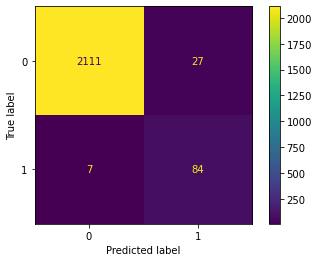

In [105]:
plot_confusion_matrix(model_default, X_test, y_test)

In [100]:
model_tuned = gridsearch.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tuned = model_tuned.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      1.00      1.00        91

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



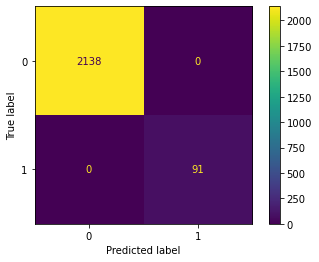

In [104]:
plot_confusion_matrix(model_tuned, X_test, y_test)

# __Data Prediction__

In [77]:
nba_clean

,pts,reb,ast,usg_pct,ast_pct
0,5.7,16.1,3.1,0.100,0.113
1,2.3,1.5,0.3,0.175,0.048
2,0.8,1.0,0.4,0.103,0.148
3,3.7,2.3,0.6,0.167,0.077
4,2.4,2.4,0.2,0.127,0.040
...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064
11141,1.2,0.3,0.1,0.164,0.033
11142,6.1,5.1,1.1,0.120,0.076
11143,2.1,3.0,0.4,0.126,0.056


In [107]:
new = pd.read_csv('new_players.csv') # mulai prediksi new players
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [108]:
new_clean = new.drop(['Unnamed: 0', 'player_id','college', 'country', 'age', 'player_height', 'player_weight', 'gp', 'net_rating', 'oreb_pct' , 'dreb_pct', 'ts_pct'], axis=1)
new_clean

,pts,reb,ast,usg_pct,ast_pct
0,3.0,4.2,0.7,0.114,0.069
1,5.7,2.2,5.4,0.129,0.344
2,18.8,5.6,5.2,0.278,0.250
3,2.5,1.3,1.1,0.171,0.174
4,3.3,3.4,0.3,0.112,0.037
...,...,...,...,...,...
495,21.8,11.8,1.8,0.222,0.068
496,12.8,4.4,1.6,0.233,0.099
497,4.7,2.6,0.5,0.174,0.072
498,6.1,3.9,0.2,0.146,0.021


In [110]:
scaler = MinMaxScaler()
scaler.fit(new_clean)
scaler_feature_predict = scaler.transform(new_clean)
predict_data = pd.DataFrame(scaler_feature_predict, columns = nba_clean.columns)
predict_data

,pts,reb,ast,usg_pct,ast_pct
0,0.095541,0.269231,0.072165,0.228,0.103448
1,0.181529,0.141026,0.556701,0.258,0.515742
2,0.598726,0.358974,0.536082,0.556,0.374813
3,0.079618,0.083333,0.113402,0.342,0.260870
4,0.105096,0.217949,0.030928,0.224,0.055472
...,...,...,...,...,...
495,0.694268,0.756410,0.185567,0.444,0.101949
496,0.407643,0.282051,0.164948,0.466,0.148426
497,0.149682,0.166667,0.051546,0.348,0.107946
498,0.194268,0.250000,0.020619,0.292,0.031484


In [111]:
pemain_predict = model_tuned.predict(new_clean)

In [112]:
new['Potential_player'] = pemain_predict

In [113]:
(new['Potential_player'] == 0).value_counts()

True     484
False     16
Name: Potential_player, dtype: int64

In [114]:
new['Recruit/No'] = new.apply(lambda x: 'No' if (x['Potential_player'] == 0) else'Recruit', axis=1)

In [115]:
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Potential_player,Recruit/No
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0,No
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0,No
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1,Recruit
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0,No
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0,No
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0,No
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0,No
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0,No


In [116]:
print(f"Jumlah pemain yang berpotensi sebanyak {len(new[new['Potential_player']==1])}")

Jumlah pemain yang berpotensi sebanyak 16
